In [1]:
import pandas as pd
import os
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
#data=pd.read_csv("E:\Sales\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_April_2019.csv")
list=[file for file in os.listdir("E:\Sales\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data")]
df=pd.DataFrame()
for files in list:
    d=pd.read_csv("E:\\Sales\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\" + files)
    df=pd.concat([df,d])
df    

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [4]:
df1=df.fillna("0")

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186850 non-null  object
 1   Product           186850 non-null  object
 2   Quantity Ordered  186850 non-null  object
 3   Price Each        186850 non-null  object
 4   Order Date        186850 non-null  object
 5   Purchase Address  186850 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [6]:
df1['Month']=df1['Order Date'].apply(lambda x:x.split('/')[0])

In [7]:
df1['Month'].unique()

array(['04', '0', '05', 'Order Date', '08', '09', '12', '01', '02', '03',
       '07', '06', '11', '10'], dtype=object)

In [8]:
df1['Month']=df1['Month'].replace('Order Date','0')

In [9]:
df1['Month']=df1['Month'].astype('float64')

In [10]:
df1['Month'].dtype

dtype('float64')

In [11]:
df1['Price Each']=df1['Price Each'].replace('Price Each','0')

In [12]:
df1['Price Each']=df1['Price Each'].astype('float64')

In [13]:
df1['Quantity Ordered']=df1['Quantity Ordered'].replace('Quantity Ordered','0')

In [14]:
df1['Quantity Ordered']=df1['Quantity Ordered'].astype('float64')

In [15]:
df1['Total Price']=df1['Quantity Ordered']*df1['Price Each']

In [16]:
x=df1.groupby('Month').sum()
x

C:\Users\VIVEK\AppData\Local\Temp\ipykernel_1108\4263373358.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x=df1.groupby('Month').sum()


,Quantity Ordered,Price Each,Total Price
Month,,,
0.0,0.0,0.00,0.00
1.0,10903.0,1811768.38,1822256.73
2.0,13449.0,2188884.72,2202022.42
3.0,17005.0,2791207.83,2807100.38
4.0,20558.0,3367671.02,3390670.24
5.0,18667.0,3135125.13,3152606.75
6.0,15253.0,2562025.61,2577802.26
7.0,16072.0,2632539.56,2647775.76
8.0,13448.0,2230345.42,2244467.88


In [17]:
df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0,23.90
1,0,0,0.0,0.00,0,0,0.0,0.00
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9.0,8.97
11682,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9.0,700.00
11683,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9.0,700.00
11684,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9.0,379.99


In [18]:
df2=x['Total Price'][1:]

In [19]:
df2

Month
1.0     1822256.73
2.0     2202022.42
3.0     2807100.38
4.0     3390670.24
5.0     3152606.75
6.0     2577802.26
7.0     2647775.76
8.0     2244467.88
9.0     2097560.13
10.0    3736726.88
11.0    3199603.20
12.0    4613443.34
Name: Total Price, dtype: float64

In [20]:
month=range(1,13)


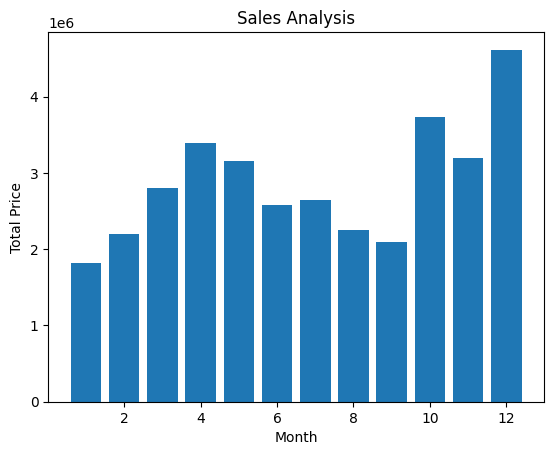

In [21]:
plt.bar(month,df2)
plt.title("Sales Analysis")
plt.xlabel("Month")
plt.ylabel("Total Price")
plt.show()

# Which city has the max Sales

In [22]:
df1['City']=df1['Purchase Address'].str.split(',').str[1]

In [23]:
df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas
1,0,0,0.0,0.00,0,0,0.0,0.00,NaN
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9.0,8.97,Los Angeles
11682,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9.0,700.00,San Francisco
11683,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9.0,700.00,San Francisco
11684,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9.0,379.99,San Francisco


In [24]:
df3=df1.groupby('City').sum()

C:\Users\VIVEK\AppData\Local\Temp\ipykernel_1108\3827844560.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3=df1.groupby('City').sum()


In [25]:
df3

,Quantity Ordered,Price Each,Month,Total Price
City,,,,
Atlanta,16602.0,2779908.20,104794.0,2795498.58
Austin,11153.0,1809873.61,69829.0,1819581.75
Boston,22528.0,3637409.77,141112.0,3661642.01
Dallas,16730.0,2752627.82,104620.0,2767975.40
Los Angeles,33289.0,5421435.23,208325.0,5452570.80
New York City,27932.0,4635370.83,175741.0,4664317.43
Portland,14053.0,2307747.47,87765.0,2320490.61
San Francisco,50239.0,8211461.74,315520.0,8262203.91
Seattle,16553.0,2733296.01,104941.0,2747755.48


In [26]:
df4=df3['Total Price'][0:]

In [27]:
df4

City
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: Total Price, dtype: float64

In [28]:
city=df1['City'].unique()

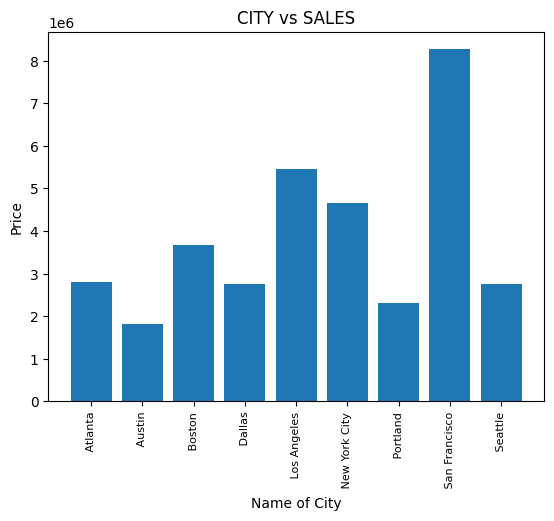

In [29]:
city=[a for a,df in df1.groupby('City')]

d=df3['Total Price'][0:]
plt.bar(city, df4)
plt.xticks(city, rotation = 'vertical',size=8)
plt.title("CITY vs SALES")
plt.xlabel("Name of City")
plt.ylabel("Price")
plt.show()

# What time should we display advertisements to maximise likelihood of customer's buying product?

In [30]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas
1,0,0,0.0,0.00,0,0,0.0,0.00,NaN
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles


In [31]:
import numpy as np

In [32]:
df1['Order Date']=df1['Order Date'].replace('0',np.nan)

In [33]:
df1['Order Date'].unique()

array(['04/19/19 08:46', nan, '04/07/19 22:30', ..., '09/23/19 07:39',
       '09/19/19 17:30', '09/30/19 00:18'], dtype=object)

In [34]:
df1['Order Date']=df1['Order Date'].replace('Order Date',np.nan)

In [35]:
df1['Order Date']=pd.to_datetime(df1['Order Date'])

In [36]:
df1['Order Date']

0       2019-04-19 08:46:00
1                       NaT
2       2019-04-07 22:30:00
3       2019-04-12 14:38:00
4       2019-04-12 14:38:00
                ...        
11681   2019-09-17 20:56:00
11682   2019-09-01 16:00:00
11683   2019-09-23 07:39:00
11684   2019-09-19 17:30:00
11685   2019-09-30 00:18:00
Name: Order Date, Length: 186850, dtype: datetime64[ns]

In [37]:
df1['Hour']=df1['Order Date'].dt.hour
df1['Minute']=df1['Order Date'].dt.minute

In [38]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas,8.0,46.0
1,0,0,0.0,0.00,NaT,0,0.0,0.00,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston,22.0,30.0
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles,14.0,38.0
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,14.0,38.0


In [39]:
a=df1.groupby('Hour').count()

In [40]:
a.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,Minute
Hour,,,,,,,,,,
0.0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1.0,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2.0,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3.0,831,831,831,831,831,831,831,831,831,831
4.0,854,854,854,854,854,854,854,854,854,854


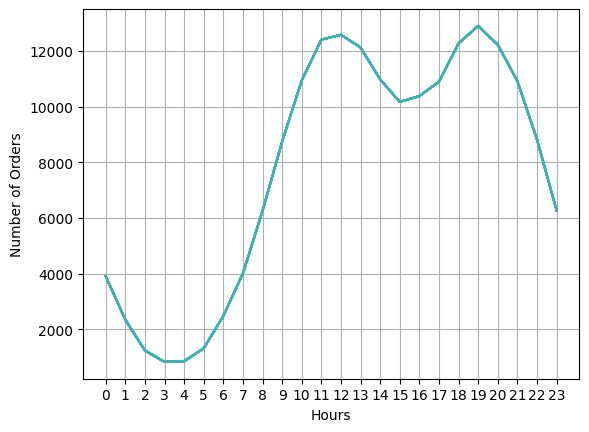

In [41]:
h=[hour for hour,df in df1.groupby('Hour')]
plt.plot(h,a)
plt.xticks(h)
plt.xlabel("Hours")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()


## My recomendetion is to add around 11am(11) or 7pm(19).

# What products more often sales together

In [42]:
 df5=df1[df1['Order ID'].duplicated(keep=False)]

In [43]:
df5

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,Hour,Minute
1,0,0,0.0,0.00,NaT,0,0.0,0.00,NaN,NaN,NaN
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles,14.0,38.0
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,14.0,38.0
18,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4.0,600.00,Los Angeles,19.0,42.0
19,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4.0,11.95,Los Angeles,19.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...
11639,259314,Wired Headphones,1.0,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9.0,11.99,Atlanta,0.0,25.0
11640,259314,AAA Batteries (4-pack),2.0,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9.0,5.98,Atlanta,0.0,25.0
11662,0,0,0.0,0.00,NaT,0,0.0,0.00,NaN,NaN,NaN
11677,259350,Google Phone,1.0,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9.0,600.00,San Francisco,13.0,49.0


In [44]:
df5['Grouped']=df5.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df5=df5[['Order ID','Grouped']].drop_duplicates()
df5

C:\Users\VIVEK\AppData\Local\Temp\ipykernel_1108\399253442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Grouped']=df5.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
1,0,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
...,...,...
11617,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
11619,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
11627,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [54]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df5['Grouped']:
    y=row.split(',')
    count.update(Counter(combinations(y,2)))
for key,value in count.most_common(10):
    print(key,value)

('0', '0') 148240
('Product', 'Product') 62835
('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160


# What Product sold the most? why do you think it sold the most

In [56]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas,8.0,46.0
1,0,0,0.0,0.00,NaT,0,0.0,0.00,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston,22.0,30.0
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles,14.0,38.0
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,14.0,38.0


In [58]:
p=df1.groupby('Product').sum()
p

C:\Users\VIVEK\AppData\Local\Temp\ipykernel_1108\1483633582.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p=df1.groupby('Product').sum()


,Quantity Ordered,Price Each,Month,Total Price,Hour,Minute
Product,,,,,,
0,0.0,0.00,0.0,0.00,0.0,0.0
20in Monitor,4129.0,451068.99,29336.0,454148.71,58764.0,122252.0
27in 4K Gaming Monitor,6244.0,2429637.70,44440.0,2435097.56,90916.0,184331.0
27in FHD Monitor,7550.0,1125974.93,52558.0,1132424.50,107540.0,219948.0
34in Ultrawide Monitor,6199.0,2348718.19,43304.0,2355558.01,89076.0,183480.0
AA Batteries (4-pack),27635.0,79015.68,145558.0,106118.40,298342.0,609039.0
AAA Batteries (4-pack),31017.0,61716.59,146370.0,92740.83,297332.0,612113.0
Apple Airpods Headphones,15661.0,2332350.00,109477.0,2349150.00,223304.0,455570.0
Bose SoundSport Headphones,13457.0,1332366.75,94113.0,1345565.43,192445.0,392603.0


In [62]:
p1=p['Quantity Ordered']
p1

Product
0                                 0.0
20in Monitor                   4129.0
27in 4K Gaming Monitor         6244.0
27in FHD Monitor               7550.0
34in Ultrawide Monitor         6199.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23217.0
Macbook Pro Laptop             4728.0
Product                           0.0
ThinkPad Laptop                4130.0
USB-C Charging Cable          23975.0
Vareebadd Phone                2068.0
Wired Headphones              20557.0
iPhone                         6849.0
Name: Quantity Ordered, dtype: float64

In [63]:
p2=df1['Product'].unique()
p2

array(['USB-C Charging Cable', '0', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor',
       'Product'], dtype=object)

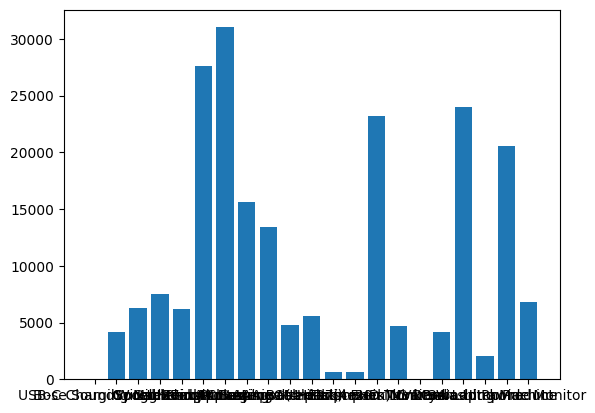

In [65]:
plt.bar(p2,p1)
plt.xticks(rota)
plt.show()